# Making a CMD for your Star Cluster

This notebook introduces a few commands that you'll need to make the Color Magnitude Diagram for your star cluster. You can also use the cells below to write code for your unit project.

## .loc[ ] indexing

In [3]:
import pandas as pd

In [4]:
df= pd.read_csv("oh_table.csv")
df.head()

,row_id,tgas_source_id,name,ra,dec,parallax,distance,G,J,rave_obs_id,rv,erv,group_id,group_size
0,659,49809491645958528,TYC 1253-388-1,59.457281,18.562195,7.7395,129.949,11.160,9.984,NaN,NaN,NaN,0,151
1,1559,66939848447027584,TYC 1804-1924-1,57.070387,25.214932,7.6087,132.557,9.066,8.137,20120109_0346p23_140,2.95,1.6,0,151
2,1904,50905051903831680,HIP 18091,58.003444,19.596690,6.7611,148.752,10.265,9.267,NaN,NaN,NaN,0,151
3,1929,51452746133437696,HIP 18544,59.507154,20.676596,7.6989,131.839,9.249,8.436,NaN,NaN,NaN,0,151
4,1944,51619115986889472,TYC 1261-1630-1,58.370320,20.907178,7.4847,134.194,11.553,10.096,NaN,NaN,NaN,0,151


In [5]:
# Here we create a sample dataframe
sample_df = pd.DataFrame({"column 1": [20,50,15,50,65,50,10], "column 2": [0,1,1,1,0,0,1]})
sample_df

,column 1,column 2
0,20,0
1,50,1
2,15,1
3,50,1
4,65,0
5,50,0
6,10,1


You can use the .loc index method to select all the items in one column which have a particular value in the second column. For example, we may want to select all items from column 1 that have a value of 0 in column 2.

Follow along with the live coding activity to see how this works.

In [6]:
# This code selects all values from column 1 where the value on that same row in column 2 is equal to 0
zero= sample_df["column 1"].loc[sample_df["column 2"]==0]
zero

0    20
4    65
5    50
Name: column 1, dtype: int64

In [7]:
data= sample_df.loc[sample_df["column 1"]<30]
data

,column 1,column 2
0,20,0
2,15,1
6,10,1


Now you try! Select all the values from column 1 where the value on that same row in column 2 is equal to 1.

In [8]:
var=sample_df["column 1"].loc[sample_df["column 2"]==1]
var

1    50
2    15
3    50
6    10
Name: column 1, dtype: int64

Now select all the values from column 2 where the value on that same row in column 1 is equal to 50.

In [9]:
var2=sample_df["column 2"].loc[sample_df["column 1"]==50]
var2

1    1
3    1
5    0
Name: column 2, dtype: int64

#### Note: You can store these selected values in a variable, just like you've done with entire columns!

## Finding absolute magnitude

You will need to convert "G" to absolute magnitude for your CMD.

Look in the dataset for distance. Using G and distance, you can calculate absolute magnitude using the following equation:

absolute magnitude = G - 5 * log(distance) + 5

In [10]:
# You will need to import numpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mpl

In [11]:
# You can use this function in your code to find the log of distance:
# np.log10()
df["absolute magnitude"]= df["G"]- 5 * np.log10(df["distance"]) +5
df.head()

,row_id,tgas_source_id,name,ra,dec,parallax,distance,G,J,rave_obs_id,rv,erv,group_id,group_size,absolute magnitude
0,659,49809491645958528,TYC 1253-388-1,59.457281,18.562195,7.7395,129.949,11.160,9.984,NaN,NaN,NaN,0,151,5.591135
1,1559,66939848447027584,TYC 1804-1924-1,57.070387,25.214932,7.6087,132.557,9.066,8.137,20120109_0346p23_140,2.95,1.6,0,151,3.453987
2,1904,50905051903831680,HIP 18091,58.003444,19.596690,6.7611,148.752,10.265,9.267,NaN,NaN,NaN,0,151,4.402686
3,1929,51452746133437696,HIP 18544,59.507154,20.676596,7.6989,131.839,9.249,8.436,NaN,NaN,NaN,0,151,3.648780
4,1944,51619115986889472,TYC 1261-1630-1,58.370320,20.907178,7.4847,134.194,11.553,10.096,NaN,NaN,NaN,0,151,5.914335


In [12]:
group8= df.loc[df["group_id"]==8]
group8.head()

,row_id,tgas_source_id,name,ra,dec,parallax,distance,G,J,rave_obs_id,rv,erv,group_id,group_size,absolute magnitude
744,3545,5996829257910614400,TYC 7855-650-1,241.064657,-40.844761,6.9262,145.249,7.583,7.407,NaN,NaN,NaN,8,47,1.772434
745,3911,5997820948678954752,TYC 7851-1-1,241.437412,-39.101934,7.2351,138.809,10.119,8.910,NaN,NaN,NaN,8,47,4.406912
746,4904,5989177825205202176,TYC 7848-1659-1,234.679345,-44.196620,7.8577,128.569,10.131,8.805,NaN,NaN,NaN,8,47,4.585319
747,5021,5989693599238982528,HIP 77432,237.103140,-42.618184,7.8655,127.971,8.814,8.112,NaN,NaN,NaN,8,47,3.278442
748,5508,5993268145899442816,HIP 79400,243.069674,-42.375176,7.9631,126.612,8.137,7.581,NaN,NaN,NaN,8,47,2.624626


### Your first task is to create a Color Magnitude Diagram for your star cluster
You can use as many of the cells below as you need. You can add new cells with the "+" button.

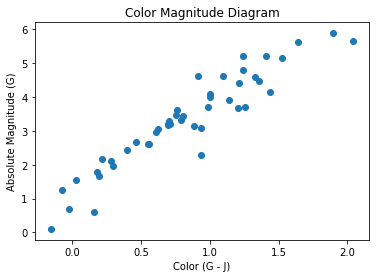

In [13]:
plt.scatter(group8["G"]-group8["J"], group8["absolute magnitude"])
plt.xlabel("Color (G - J)")
plt.ylabel("Absolute Magnitude (G)")
plt.title("Color Magnitude Diagram")
plt.show()

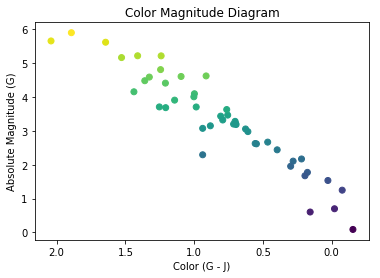

In [14]:
cm = plt.cm.get_cmap("RdYlBu")# This is the colormap we'll use for our data points. Note: _r reverses the colormap
plt.scatter(group8["G"]-group8["J"],group8["absolute magnitude"], c=group8["absolute magnitude"]) # This plots all our points as a scatterplot
plt.xlabel("Color (G - J)")
plt.ylabel("Absolute Magnitude (G)")
plt.title('Color Magnitude Diagram')
plt.gca().invert_xaxis() # This inverts the x axis so that the hottest stars are on the left.
plt.show()

### Coding Challenge 1: Add the sun to your color magnitude diagram
### Coding Challenge 2: Add a colormap to your diagram

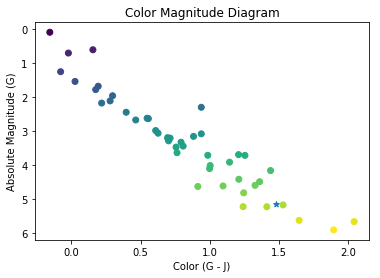

In [15]:
SunJ = 3.64
SunG = 5.12
#Use SunG as absolute magnitude
plt.scatter(SunG-SunJ, SunG, marker="*")

cm = plt.cm.get_cmap("RdYlBu")# This is the colormap we'll use for our data points. Note: _r reverses the colormap
plt.scatter(group8["G"]-group8["J"],group8["absolute magnitude"], c=group8["absolute magnitude"]) # This plots all our points as a scatterplot
plt.xlabel("Color (G - J)")
plt.ylabel("Absolute Magnitude (G)")
plt.title('Color Magnitude Diagram')
plt.gca().invert_yaxis() # This inverts the x axis so that the hottest stars are on the left.
plt.show()

### Coding Challenge 3: Create histograms for the absolute magnitude & color of your star cluster

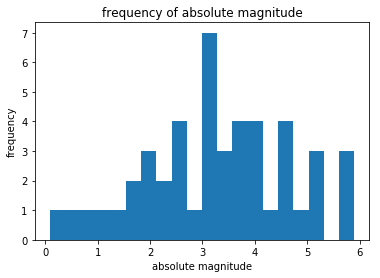

In [16]:
plt.hist(group8["absolute magnitude"],20)
plt.title("frequency of absolute magnitude")
plt.xlabel("absolute magnitude")
plt.ylabel("frequency")
plt.show()

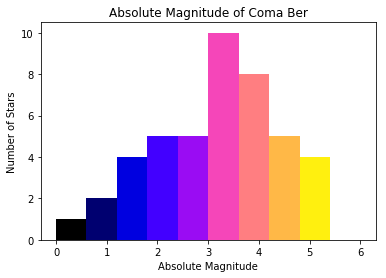

In [23]:
#cm = plt.cm.get_cmap("gnuplot2")
#plt.hist(star["abmag"], 10, (0, 6), cmap = cm)
plt.title("Absolute Magnitude of Coma Ber")
plt.xlabel("Absolute Magnitude")
plt.ylabel("Number of Stars")
#plt.show()
cm = plt.cm.get_cmap('gnuplot2')
# Plot histogram.
n, bins, patches = plt.hist(group8["absolute magnitude"], 10, (0,6))
bin_centers = 0.5 * (bins[:-1] + bins[1:])
# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
   plt.setp(p, 'facecolor', cm(c))
plt.savefig("Absolute_Magnitude_of_Coma_Ber")
plt.show()

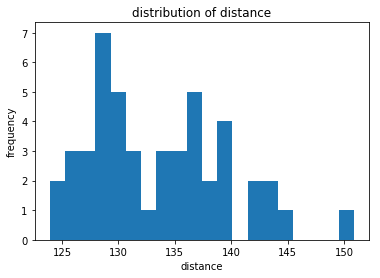

In [18]:
plt.hist(group8["distance"],20)
plt.title("distribution of distance")
plt.xlabel("distance")
plt.ylabel("frequency")
plt.show()

### Coding Challenge 4:  Create a new sample dataframe where the value in column 2 is 0

In [80]:
new_sample= sample_df.loc[sample_df["column 2"]==0]
new_sample

,column 1,column 2
0,20,0
4,65,0
5,50,0
